# <b>Relatório de Análise VII</b>

### Criando agrupamento

In [133]:
import pandas as pd

In [134]:
dados = pd.read_csv('dados/aluguel_resdiencial.csv', sep= ';')

In [135]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,53.18,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,100.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,22.69,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,61.79,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,62.23,Apartamento


Média dos valores

In [136]:
dados['Valor'].mean()

5046.172821405663

Alguel médio dos bairros

In [137]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Botafogo','Flamengo','Tijuca']
       
selecao = dados['Bairro'].isin(bairros)

dados = dados[selecao]

In [139]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [140]:
#Visualizando os dados da indexação
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Tijuca


In [141]:
for bairro, data in grupo_bairro:
    print(dados['Valor'].mean())

2043.52
2043.52
2043.52
2043.52
2043.52
2043.52


In [142]:
#calculando valor médio
for bairro, data in grupo_bairro:
    a =(dados['Valor'].mean())
    print(f'{bairro}, {a}')

Barra da Tijuca, 2043.52
Botafogo, 2043.52
Copacabana, 2043.52
Flamengo, 2043.52
Ipanema, 2043.52
Tijuca, 2043.52


In [143]:
#maneira mais fácil de realizar
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Tijuca,2043.52,711.69


### <b>Estatísticas descritivas</b>

In [144]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [145]:
grupo_bairro['Valor'].aggregate(['min', 'max',]).rename(columns= {'min' : 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Tijuca,750.0,45000.0


In [146]:
#Facilitando a visualização

# %matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize =(20,10))

Text(0.5, 0, 'Bairros')

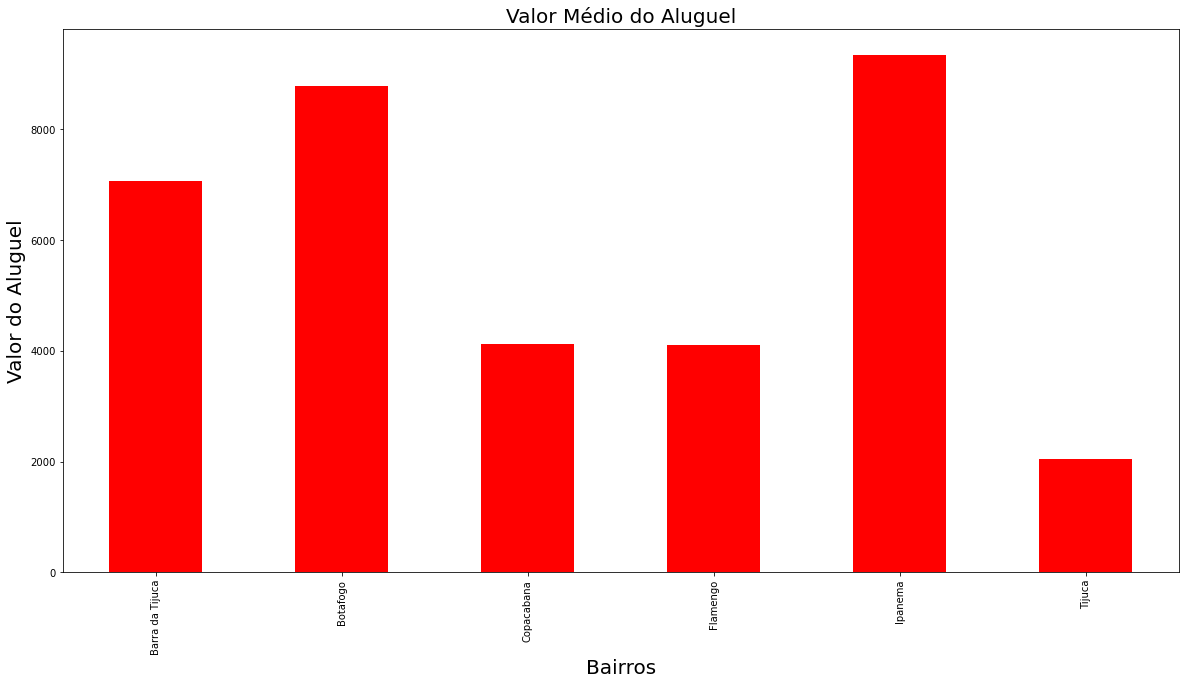

In [151]:
#Gerando visualização do desvio padrão
fig = grupo_bairro['Valor'].mean().plot.bar(color ='red')
fig.set_ylabel("Valor do Aluguel",{'fontsize' : 20})
fig.set_title("Valor Médio do Aluguel", {'fontsize' : 20})
fig.set_xlabel("Bairros", {'fontsize' : 20})


# <b> Exercício </b>


Como devemos proceder para obter um DataFrame com as notas médias dos alunos, com duas casas decimais, segundo seu sexo?

In [ ]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [ ]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean()).round(2)
sexo.columns = ['Notas Médias']

sexo



,Notas Médias
Sexo,
F,5.82
M,7.12


### <b> 2 </b>

In [152]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [160]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [161]:
estatisticas = ['mean', 'std', 'min', 'max'] #estatísticas usadas
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', #usado para renomear
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.960000,0.256320,3.69,4.2
Cebola,2.060000,0.409512,1.69,2.5
Tomate,3.426667,0.518684,2.99,4.0
